In [21]:
import pandas as pd 
import numpy as np 
from sklearn.preprocessing import StandardScaler 
from sklearn.linear_model  import Ridge,Lasso,RidgeCV, LassoCV, ElasticNet, ElasticNetCV, LinearRegression
from sklearn.model_selection import train_test_split
import statsmodels.api as sm 
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
import pickle

In [22]:
def adj_r2(x,y):
    r2 = regression.score(x,y)
    n = x.shape[0]
    p = x.shape[1]
    adjusted_r2 = 1-(1-r2)*((n-1)/(n-p-1))
    return adjusted_r2

In [23]:
data =pd.read_csv('Admission_Prediction.csv')
data.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337.0,118.0,4.0,4.5,4.5,9.65,1,0.92
1,2,324.0,107.0,4.0,4.0,4.5,8.87,1,0.76
2,3,NaN,104.0,3.0,3.0,3.5,8.00,1,0.72
3,4,322.0,110.0,3.0,3.5,2.5,8.67,1,0.80
4,5,314.0,103.0,2.0,2.0,3.0,8.21,0,0.65


In [24]:
data.describe()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,500.000000,485.000000,490.000000,485.000000,500.000000,500.00000,500.000000,500.000000,500.00000
mean,250.500000,316.558763,107.187755,3.121649,3.374000,3.48400,8.576440,0.560000,0.72174
std,144.481833,11.274704,6.112899,1.146160,0.991004,0.92545,0.604813,0.496884,0.14114
min,1.000000,290.000000,92.000000,1.000000,1.000000,1.00000,6.800000,0.000000,0.34000
25%,125.750000,308.000000,103.000000,2.000000,2.500000,3.00000,8.127500,0.000000,0.63000
50%,250.500000,317.000000,107.000000,3.000000,3.500000,3.50000,8.560000,1.000000,0.72000
75%,375.250000,325.000000,112.000000,4.000000,4.000000,4.00000,9.040000,1.000000,0.82000
max,500.000000,340.000000,120.000000,5.000000,5.000000,5.00000,9.920000,1.000000,0.97000


In [25]:
data['University Rating'] = data['University Rating'].fillna(data['University Rating'].mode()[0] )
data['TOEFL Score'] = data['TOEFL Score'].fillna(data['TOEFL Score'].mean())
data['GRE Score']  = data['GRE Score'].fillna(data['GRE Score'].mean())

In [26]:

data.describe()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.00000,500.000000,500.000000,500.00000
mean,250.500000,316.558763,107.187755,3.118000,3.374000,3.48400,8.576440,0.560000,0.72174
std,144.481833,11.103952,6.051338,1.128993,0.991004,0.92545,0.604813,0.496884,0.14114
min,1.000000,290.000000,92.000000,1.000000,1.000000,1.00000,6.800000,0.000000,0.34000
25%,125.750000,309.000000,103.000000,2.000000,2.500000,3.00000,8.127500,0.000000,0.63000
50%,250.500000,316.558763,107.000000,3.000000,3.500000,3.50000,8.560000,1.000000,0.72000
75%,375.250000,324.000000,112.000000,4.000000,4.000000,4.00000,9.040000,1.000000,0.82000
max,500.000000,340.000000,120.000000,5.000000,5.000000,5.00000,9.920000,1.000000,0.97000


In [27]:
data= data.drop(columns = ['Serial No.'])
data.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337.000000,118.0,4.0,4.5,4.5,9.65,1,0.92
1,324.000000,107.0,4.0,4.0,4.5,8.87,1,0.76
2,316.558763,104.0,3.0,3.0,3.5,8.00,1,0.72
3,322.000000,110.0,3.0,3.5,2.5,8.67,1,0.80
4,314.000000,103.0,2.0,2.0,3.0,8.21,0,0.65


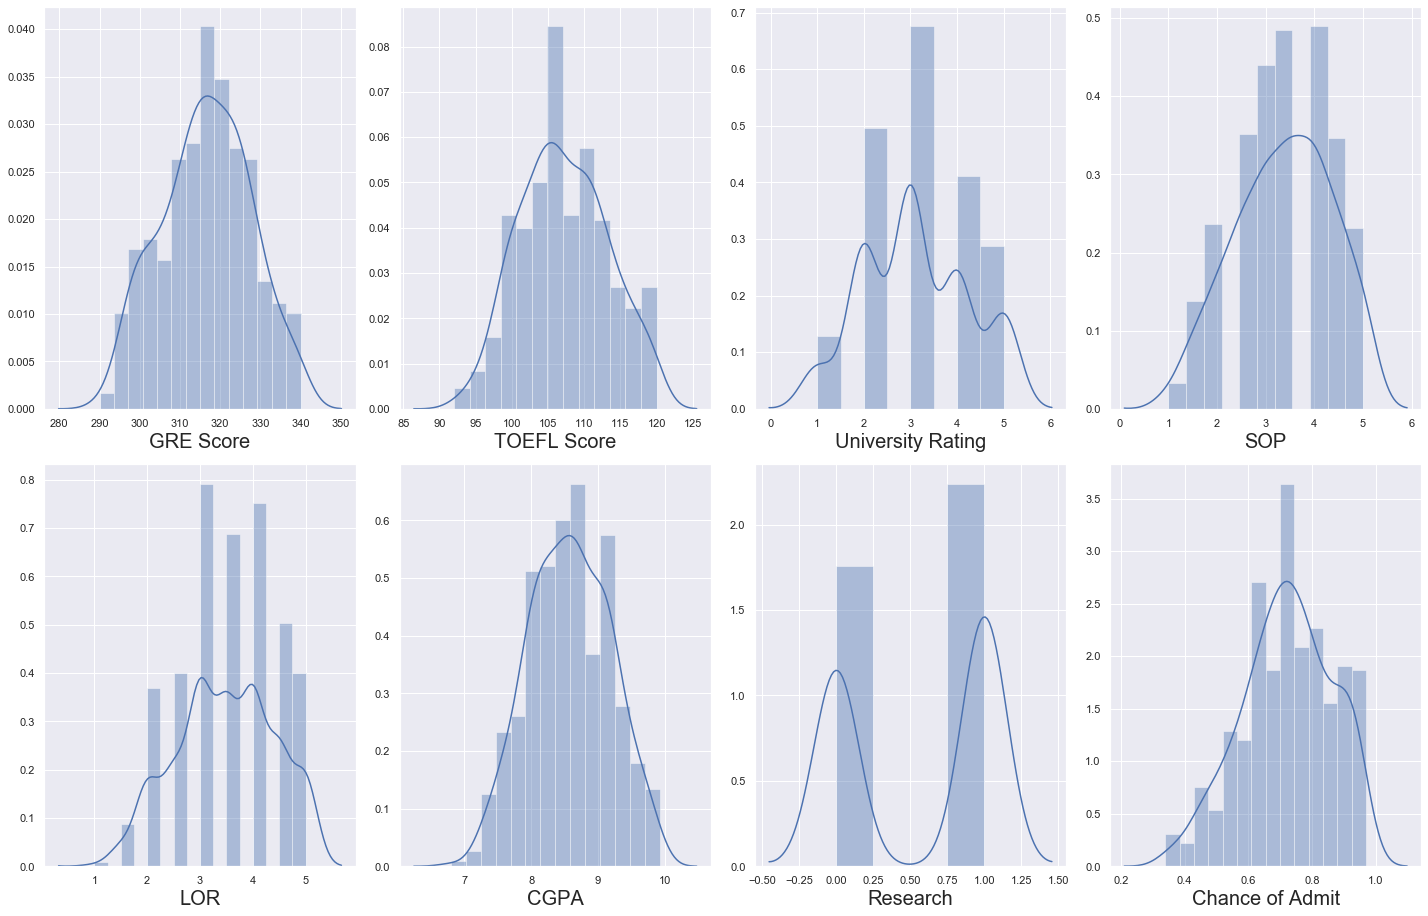

In [28]:
plt.figure(figsize=(20,25), facecolor='white')
plotnumber = 1

for column in data:
    if plotnumber<=16:
        ax = plt.subplot(4,4,plotnumber)
        sns.distplot(data[column])
        plt.xlabel(column,fontsize=20)
        
    plotnumber+=1
plt.tight_layout()

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches

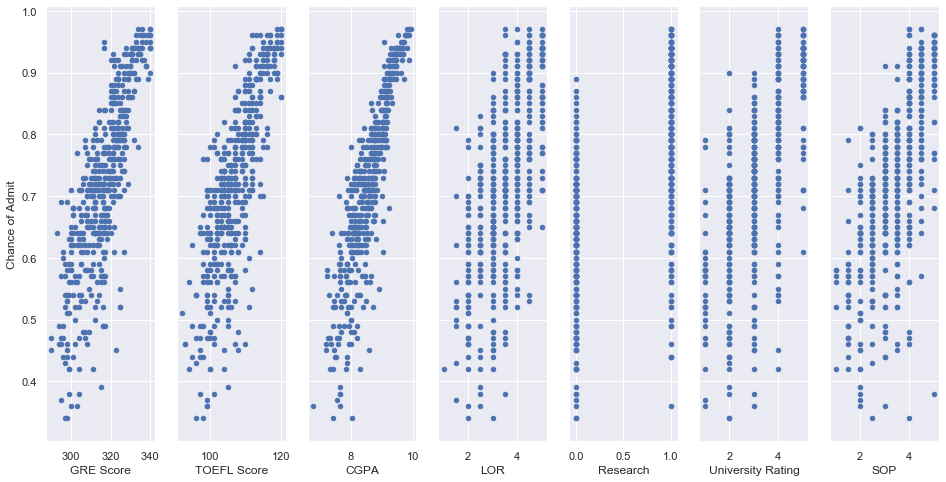

In [29]:
fig, axs = plt.subplots(1, 7, sharey=True)
data.plot(kind='scatter', x='GRE Score', y='Chance of Admit', ax=axs[0], figsize=(16, 8))
data.plot(kind='scatter', x='TOEFL Score', y='Chance of Admit', ax=axs[1])
data.plot(kind='scatter', x='CGPA', y='Chance of Admit', ax=axs[2])
data.plot(kind='scatter', x='LOR', y='Chance of Admit', ax=axs[3])
data.plot(kind='scatter', x='Research', y='Chance of Admit', ax=axs[4])
data.plot(kind='scatter', x='University Rating', y='Chance of Admit', ax=axs[5])
data.plot(kind='scatter', x='SOP', y='Chance of Admit', ax=axs[6])


In [32]:
y = data['Chance of Admit']
X =data.drop(columns = ['Chance of Admit'])

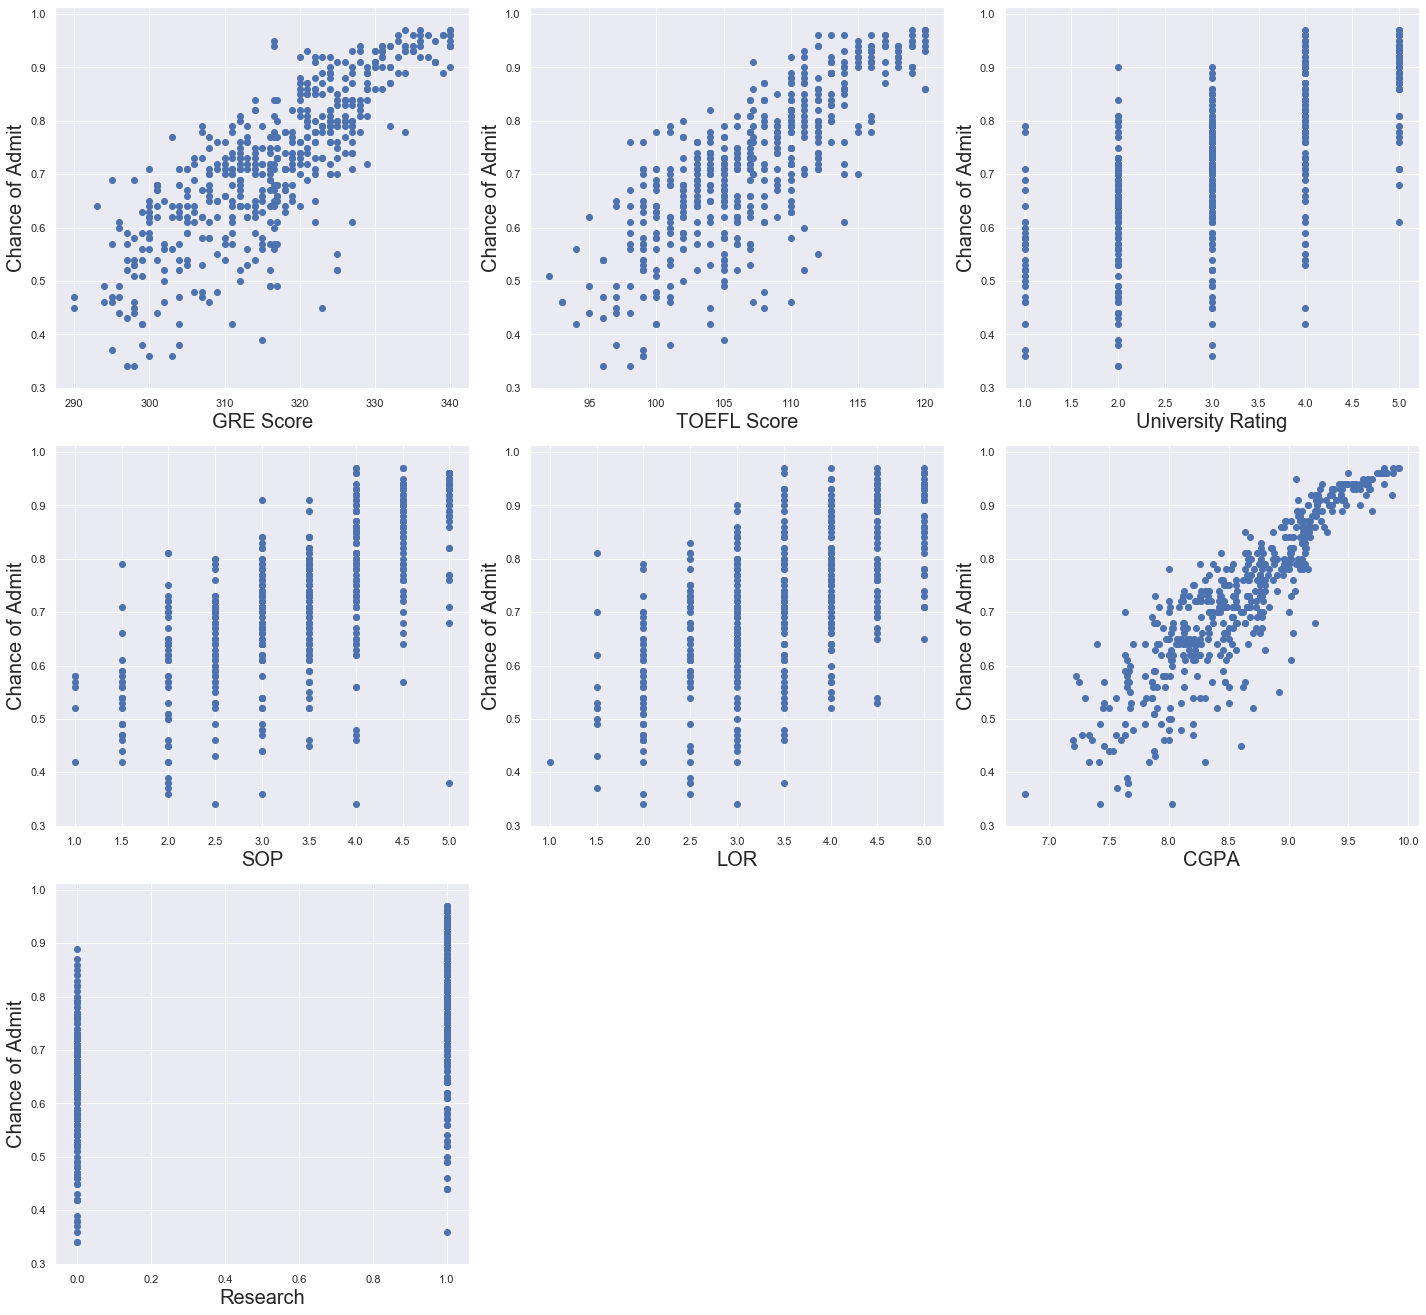

In [33]:
plt.figure(figsize=(20,30), facecolor='white')
plotnumber = 1

for column in X:
    if plotnumber<=15 :
        ax = plt.subplot(5,3,plotnumber)
        plt.scatter(X[column],y)
        plt.xlabel(column,fontsize=20)
        plt.ylabel('Chance of Admit',fontsize=20)
    plotnumber+=1
plt.tight_layout()

In [34]:
scaler =StandardScaler()

X_scaled = scaler.fit_transform(X)

In [ ]:
## The idea behind StandardScaler is that it will transform your data such that its distribution will have a mean value 0 and standard deviation of 1.
##In case of multivariate data, this is done feature-wise (in other words independently for each column of the data).
##Given the distribution of the data, each value in the dataset will have the mean value subtracted, and then divided by the standard deviation of the whole dataset (or feature in the multivariate case).

In [35]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
variables = X_scaled
vif = pd.DataFrame()
vif["VIF"] = [variance_inflation_factor(variables, i) for i in range(variables.shape[1])]
# Finally, I like to include names so it is easier to explore the result
vif["Features"] = X.columns

In [47]:
vif

,VIF,Features
0,4.152735,GRE Score
1,3.793345,TOEFL Score
2,2.517272,University Rating
3,2.776393,SOP
4,2.037449,LOR
5,4.654369,CGPA
6,1.459411,Research


In [36]:
x_train,x_test,y_train,y_test = train_test_split(X_scaled,y,test_size = 0.25,random_state=355) ## splitting the dataset

In [37]:
y_train

378    0.56
23     0.95
122    0.57
344    0.47
246    0.72
       ... 
51     0.56
291    0.56
346    0.47
130    0.96
254    0.85
Name: Chance of Admit, Length: 375, dtype: float64

In [38]:
x_train

array([[-1.22229835e+00, -1.51982203e+00, -1.87788687e+00, ...,
        -1.06433187e+00, -1.53331383e+00, -1.12815215e+00],
       [ 5.12433309e-15,  1.95396044e+00,  1.66864169e+00, ...,
         1.09894429e+00,  1.85955927e+00,  8.86405260e-01],
       [-5.91260806e-01, -1.96476326e-01,  7.82009548e-01, ...,
        -1.06433187e+00, -3.58221197e-01, -1.12815215e+00],
       ...,
       [-1.13215013e+00, -1.68524024e+00, -9.91254733e-01, ...,
        -1.60515091e+00, -1.54986443e+00, -1.12815215e+00],
       [ 2.02303760e+00,  1.12686938e+00,  1.66864169e+00, ...,
         1.09894429e+00,  1.95886287e+00,  8.86405260e-01],
       [ 4.00369625e-01,  1.12686938e+00,  7.82009548e-01, ...,
         1.63976333e+00,  8.99624440e-01, -1.12815215e+00]])

In [39]:
regression = LinearRegression()

regression.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [40]:
filename = 'finalized_model.pickle'
pickle.dump(regression, open(filename, 'wb')) ## wb is for wrtiting , w=write ; b=byte

In [41]:
loaded_model = pickle.load(open(filename, 'rb')) ## rb is for reading (r=reading , b=byte)
a=loaded_model.predict(scaler.transform([[300,110,5,5,5,10,1]]))
a

array([0.92190162])

In [42]:
regression.score(x_train,y_train)

0.8415250484247909

In [43]:
adj_r2(x_train,y_train)

0.8385023654247188

In [44]:
regression.score(x_test,y_test)

0.7534898831471066

In [45]:
adj_r2(x_test,y_test)

0.7387414146174464

In [46]:
# Lasso Regularization
# LassoCV will return best alpha and coefficients after performing 10 cross validations
lasscv = LassoCV(alphas = None,cv =10, max_iter = 100000, normalize = True)
lasscv.fit(x_train, y_train)

LassoCV(alphas=None, copy_X=True, cv=10, eps=0.001, fit_intercept=True,
        max_iter=100000, n_alphas=100, n_jobs=None, normalize=True,
        positive=False, precompute='auto', random_state=None,
        selection='cyclic', tol=0.0001, verbose=False)

In [47]:
alpha = lasscv.alpha_
alpha

3.0341655445178153e-05

In [48]:
#now that we have best parameter, let's use Lasso regression and see how well our data has fitted before

lasso_reg = Lasso(alpha)
lasso_reg.fit(x_train, y_train)

Lasso(alpha=3.0341655445178153e-05, copy_X=True, fit_intercept=True,
      max_iter=1000, normalize=False, positive=False, precompute=False,
      random_state=None, selection='cyclic', tol=0.0001, warm_start=False)

In [51]:
lasso_reg.score(x_test, y_test)

0.7534654960492284

In [52]:
# Using Ridge regression model
# RidgeCV will return best alpha and coefficients after performing 10 cross validations. 
# We will pass an array of random numbers for ridgeCV to select best alpha from them

alphas = np.random.uniform(low=0, high=10, size=(50,))
ridgecv = RidgeCV(alphas = alphas,cv=10,normalize = True)
ridgecv.fit(x_train, y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


RidgeCV(alphas=array([6.08184582, 3.30032879, 3.6865774 , 3.41584432, 7.27374242,
       9.26548747, 1.66643849, 4.9718002 , 4.28538189, 0.4746673 ,
       9.39349045, 2.31807859, 8.52762285, 2.51749649, 7.45441986,
       5.53181782, 9.66163614, 3.98303319, 4.42431385, 9.21517862,
       5.39411021, 5.29533694, 6.31746998, 8.71449335, 8.64974844,
       2.78339033, 5.19988793, 0.71981025, 9.37912637, 8.92354851,
       2.5567518 , 0.17860027, 5.75231511, 3.30784409, 1.56822282,
       7.11019917, 2.59698518, 5.99821626, 9.59310547, 0.36000754,
       9.18279279, 7.76530673, 7.92779314, 7.61083824, 8.90372783,
       4.27084142, 2.35952123, 5.68379985, 8.73153591, 3.52417775]),
        cv=10, fit_intercept=True, gcv_mode=None, normalize=True, scoring=None,
        store_cv_values=False)

In [53]:
ridgecv.alpha_

0.1786002694157962

In [54]:
ridge_model = Ridge(alpha=ridgecv.alpha_)
ridge_model.fit(x_train, y_train)

Ridge(alpha=0.1786002694157962, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

In [55]:
ridge_model.score(x_test, y_test)

0.7535771695214883

In [56]:
# Elastic net

elasticCV = ElasticNetCV(alphas = None, cv =10)

elasticCV.fit(x_train, y_train)

ElasticNetCV(alphas=None, copy_X=True, cv=10, eps=0.001, fit_intercept=True,
             l1_ratio=0.5, max_iter=1000, n_alphas=100, n_jobs=None,
             normalize=False, positive=False, precompute='auto',
             random_state=None, selection='cyclic', tol=0.0001, verbose=0)

In [58]:
elasticCV.alpha_

0.0011069728449315508

In [59]:
elasticCV.l1_ratio ## how close model is to l1(lasso) regularisation closer to 0 means l1 , closer to 1 means l2(ridge)

0.5

In [60]:
elasticnet_reg = ElasticNet(alpha = elasticCV.alpha_,l1_ratio=0.5) ## 50 percent l1 and half l2
elasticnet_reg.fit(x_train, y_train)

ElasticNet(alpha=0.0011069728449315508, copy_X=True, fit_intercept=True,
           l1_ratio=0.5, max_iter=1000, normalize=False, positive=False,
           precompute=False, random_state=None, selection='cyclic', tol=0.0001,
           warm_start=False)

In [61]:
elasticnet_reg.score(x_test, y_test)

0.7531695370639867